# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [17]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

When using PCA, we can get most out of the data from the first principal component which has the highest variance. The first several PCA dimensions will be the products that have the most variance or highest standard deviation. Based on the readme file, Fresh has the highest std, second comes Grocery and third Milk. 

  1. Fresh: 12647.329
  2. Grocery: 9503.163
  3. Milk: 7380.377
  
For ICA dimensions, the type of vectors would be the products that has the maximal mutual information. Highly correlated features will be combined together and ICA will filter out the noise to find the mutually independent causes. In this case, a vector might show characteristics of for example a restaurant that has a high positive correlation between fresh and detergents_paper.

### PCA

In [5]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

There is a 12% decrease from dimension one to dimension two's variance. It quickly drops off after dimension two, where there is a 83% decrease from dimension two to dimension three's variance. Based on the percentage of variance explained by each component, I will choose the first two because it is capable of explaining 86% of the data, but I would train on different numbers of principal components to examine the accuracy. I would train on 2 principal components and 3 principal components and see which has a higher accuracy. 


#### First principal component analysis

The 'Fresh' feature is most prominent in this component. This information tells us that there's a wide variance in how customers spend on 'Fresh' products. This component will help in distinguishing the customers in groups based on their spending on Fresh products. For example, large stores might spend more on 'fresh' products than small family run shops. 

#### Second principal component analysis

The 'Grocery' feature is most prominent. Then comes the 'Milk' feature in second place, and in third the 'Detergents_paper" feature. Also this component tells us that there's a wide variance in how customers spend grocery products. Analyzing the grocery feature will also be helping in dividing up the customers in to groups. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

The dimensions seem to represent the variation of how much was spent on different types of products. This information will be useful in forming groups that have similar spending patterns. Instead of using original features, we can rely on the newly created components to train the classifier. PCA gives the company the opportunity to narrow down the number of features to several that can best describe the data. PCA has the power of reducing the dimensionality of data and still maintain a good amount of information needed to undestand the data. In this case, we reduced data from six to two dimensions, and this will make us have an easier time visualizing and comprehending the data. 

### ICA

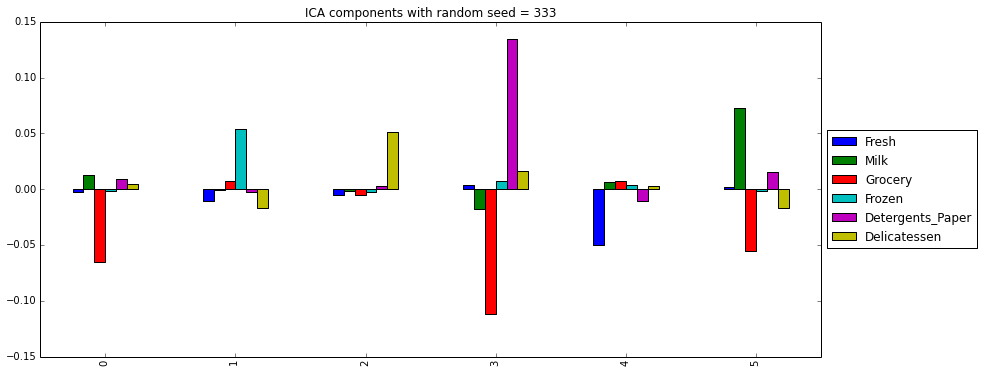

In [43]:
from sklearn.decomposition import FastICA

scaled_data = data.copy()
scaled_data -= scaled_data.mean(axis=0)
scaled_data /= scaled_data.std(axis=0) 

def fit_ica(data, random_state):
    ica = FastICA(n_components=data.shape[1], random_state=random_state)
    ica.fit(data)
    ica_components = pd.DataFrame(ica.components_)
    ica_components.columns = ["Fresh", "Milk", "Grocery", "Frozen", 
                          "Detergents_Paper", "Delicatessen"]
    return ica_components
ax = fit_ica(scaled_data, 333).plot(kind="bar", title="ICA components with random seed = 333", figsize = (14,6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

1. First Component (0)
    * This seem to represent a convenient store when spending is high for groceries and low for milk, detergents_paper, and delicatessen. It could represent a cafe when spending is high on milk, detergents_paper, and delicatessen while grocery is low. There is an inverse correlation between the group of Fresh, Grocery, and Frozen and the group of Milk, Detergents_paper, and delicatessen products. 
2. Second Component (1)
    * This could represent a shop that specializes in selling frozen food for their high spending on frozen goods. There is an inverse correlation between the group of Frozen, grocery and the group of fresh, milk, detergents_paper, and delicatessen products.  
3. Third Component (2)
    * This could represent a deli shop for its large spending in delicatessen products. There is an inverse correlation between the group of delicatessen, detergents_paper and the group of fresh, milk, grocery, and frozen products.   
4. Fourth Component (3)
    * This could represent a shop that mainly sells detergents_paper products or a grocery store due to the large inverse correlation between grocery and detergents_paper products. There is an inverse correlation between the group of fresh, frozen, detergents_paper, delicatesssen and the group of milk, and grocery products.   
5. Fifth Component (4)
    * This seem to represent a restaurant for the large amount of spending on fresh products and some spending on detergents_paper products. There is an inverse correlation between the group of Fresh, Detergents_paper vs Milk, Groceries, Frozen, and Delicatessan products.    
6. Sixth Component (5)
    * This could represent a cafe shop for its large spending on milk and some spending on detergents_paper. There is an inverse correlation between the group of fresh, Milk, detergents_paper and the group of Frozen, grocery, and delicatessen products.    

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
#### Advantage of using K Means clustering

One advantage is that implementing K Means clustering is simpler compared to other clustering algorithsm. It requires three steps explained below. 
        1. Consider each object a cluster
        2. Define intercluster distance (distance between two pointsin the 2 clusters)
        3. Merge 2 closest clusters
Repeat n-k times to make k clusters
Because of the simple implementation, it is fast, robust and easy to understand (when k is small).

Another advantage is that it will give you good results if you know that the data set can be seperated well.

#### Advantage of using Gaussian Mixture Models

Gaussian Mixture Models are also computationally fast and they do well with real examples because Gaussian models represent the unlikelyhood of extreme outliers. A lot of real world examples tend to have a bell curve distribution. 

Another advantage is that if you have a mixture model with high likelihood, you will see a tight cluster, and overall will cover the overall pattern of the data set. Patterns in the data will be explained by the distributions

#### Comparing K Means clustering and Gaussian Mixture Models

Speedwise: K Means will be slower than GMM since it is finding a hard assignment for each data point where as GMM is more of a generalized version of K means and finds the likelihood of a point in a cluster ("soft assignment").  

Implementation wise:
K Means tries to find a "hard assignment" for the data point while GMM will find the "soft assignment" for the data point to express the uncertainty.

#### Which one is better for this particular problem?

I chose Gaussian Mixure Models to create clusters for this problem because there could be some uncertainty in clearly distinguishing whether a point will be in cluster A or B with hard assignment. GMM will take in to account the variance, covariance, and the uncertainty of placing the data point with soft assignment. 


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

In [6]:
# First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

GMMclusters3 = GMM(n_components=3).fit(reduced_data)
GMMclusters4 = GMM(n_components=4).fit(reduced_data)
GMMclusters6 = GMM(n_components=6).fit(reduced_data)
print GMMclusters3
print GMMclusters4
print GMMclusters6

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z3 = GMMclusters3.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = GMMclusters4.predict(np.c_[xx.ravel(), yy.ravel()])
Z6 = GMMclusters6.predict(np.c_[xx.ravel(), yy.ravel()])

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
GMMcentroids3 = GMMclusters3.means_
GMMcentroids4 = GMMclusters4.means_
GMMcentroids6 = GMMclusters6.means_
print GMMcentroids3
print GMMcentroids4
print GMMcentroids6

[[  7007.45427668   4294.01360677]
 [   313.48539412  -6497.20521133]
 [-17858.6536729   10050.33930164]]
[[  2339.15204219  -6708.93065712]
 [  7174.54719282   5469.02876453]
 [ -9486.9742574   34645.20428228]
 [-15372.37194307  -3334.43379857]]
[[-18446.57849686  45870.89042071]
 [ -5638.84255985  -2810.66335085]
 [  9535.08162622   2894.19935877]
 [-31289.98805584  -6764.93243183]
 [  2961.28162427  -7171.7089963 ]
 [  3169.22733142  13343.33567218]]


1 [ 7007.45427668  4294.01360677]
2 [  313.48539412 -6497.20521133]
3 [-17858.6536729   10050.33930164]


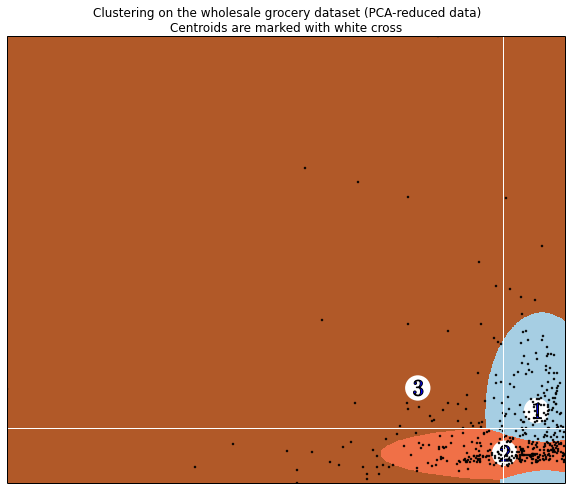

In [50]:
def plotClusters(cent, Z):    
    # Put the result into a color plot 
    # seperate points
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 8))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=4)
    plt.scatter(cent[:, 0], cent[:, 1],
                marker='o', s=500, linewidths=3,
                color='w')
    
    for i, c in enumerate(cent):
        print i+1, c
        plt.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1, s=250)
        
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.axhline(0, color='white')
    plt.axvline(0, color='white')
    plt.show()

plotClusters(GMMcentroids3, Z3)

1 [ 2339.15204219 -6708.93065712]
2 [ 7174.54719282  5469.02876453]
3 [ -9486.9742574   34645.20428228]
4 [-15372.37194307  -3334.43379857]


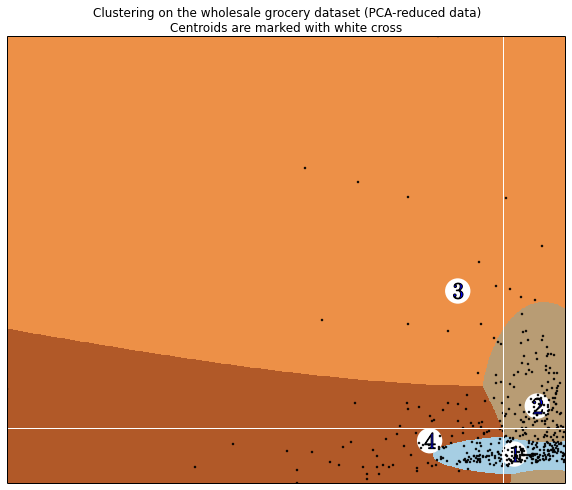

In [51]:
plotClusters(GMMcentroids4, Z4)

1 [-18446.57849686  45870.89042071]
2 [-5638.84255985 -2810.66335085]
3 [ 9535.08162622  2894.19935877]
4 [-31289.98805584  -6764.93243183]
5 [ 2961.28162427 -7171.7089963 ]
6 [  3169.22733142  13343.33567218]


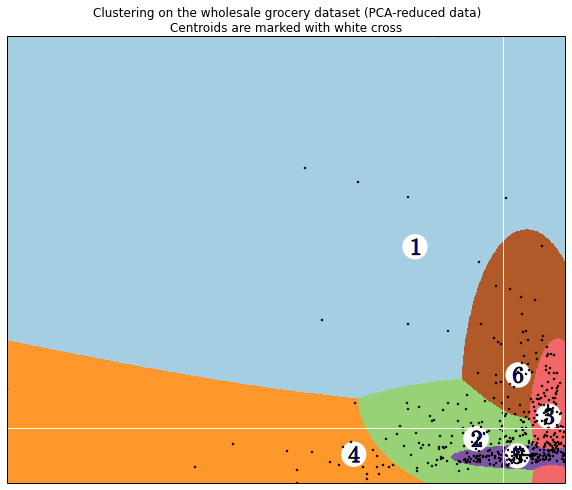

In [52]:
plotClusters(GMMcentroids6, Z6)

### What number of clusters work best?

I tested with three, four, and six clusters. 
I think for this dataset six clusters work best. Three clusters is not accurate enough to describe the data especially the blue area can be minimized and another cluster could be made. 
Four clusters does a good job but there are areas especially in the blue cluster that can be divided into two clusters. You can see a very condensed area and not so condensed area in the blue cluster. With six clusters, that area is divided into two clusters. 

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

The central objects in each cluster should represent a typical customer of a certain segment in the market.It is the point which explains the overall average trait of the typical customer. For example, if we look at the very dense horizontal bar like cluster, the dots represent the customer and they are very similar to each other. The white cross will describe the average of those customers. 

The graph above represents the customer data where in the x-axis we have the first principal component and in the y-axis, the second principal component. Clusters are distinguished with color use. 

The first component will show the negative values of 'Fresh' products, and the second component, the positive values of grocery, milk, and detergents_paper products. Looking at the axis line, we can see that the larger the negative x values, the larger the magnitude of the first component. 

second component products - Grocery, Milk, and detergents_paper products

#### Group 1 Analysis
The cluster that covers the largest area represents customers that buy a lot of fresh and second component products. These customers could be owners of a large bulk stores like Costco or Sam's club. 
#### Group 2 Analysis
The group to the left of group 5 represents customers that buys mostly fresh products, and some second component products. These customers could be owners of restaurants. 
#### Group 3 Analysis
The small vertical strip on the lower right corner represents customers that buy mostly products from the second component and that don't buy fresh products. These customers might own a convenience store.
#### Group 4 Analysis
The group to the left of group 1 represents customers that buys mostly large amounts of fresh products. The customers here could be owners of large food corporations that distribute fresh products or catering business.
#### Group 5 Analysis
The small narrow vertical strip just below the origin represents customers that buy mostly fresh products and don't buy much of second component products. There's a bit of a variance in how theses customers spend on fresh products. These customers might own a deli shop, fast food restaurant or a cafe.
#### Group 6 Analysis
The larger mountain like cluster right above group 2 represents customers that don't spend much on fresh products and spends more on second component products. This could be customers who own grocery stores.

### Sampling from Clusters

In [53]:
labels = GMMclusters6.predict(reduced_data)
k = 6
rand_point = 6
for i in range(k):
    print 'Sampling from cluster {0}'.format(i+1)
    print data[labels == i][rand_point:rand_point+1]
    print reduced_data[labels == i][rand_point]
    
data.describe().round()

Sampling from cluster 1
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
183  36847  43950    20170   36534               239         47943
[-37917.65922437  27331.45016181]
Sampling from cluster 2
    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
13  21217  6208    14982    3095              6707           602
[-9396.69557902  5913.15703681]
Sampling from cluster 3
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
43    630  11095    23998     787              9529            72
[  9967.853639    18648.76241638]
Sampling from cluster 4
     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
125  76237  3473     7102   16538               778           918
[-64420.95895419 -10008.46159859]
Sampling from cluster 5
    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
32  21632  1318     2886     266               918           405
[-8061.35614324 -7976.99061785]
Sampling from cluster 6
    Fresh  Milk  Grocery  Frozen

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440,440,440,440,440,440
mean,12000,5796,7951,3072,2881,1525
std,12647,7380,9503,4855,4768,2820
min,3,55,3,25,3,3
25%,3128,1533,2153,742,257,408
50%,8504,3627,4756,1526,816,966
75%,16934,7190,10656,3554,3922,1820
max,112151,73498,92780,60869,40827,47943


#### Sample from Cluster 1
By looking at one sample, we can see that a customer equally and largely spends on fresh, milk, grocery, frozen, and delicatessen. My prediction from above is accurate in that this customer's large spending is seen in fresh goods. However, by sampling we found out that this customer spends the most in Delicatessen, and large purchases which are above mean is made in every category except for detergents_paper. This customer could be, as predicted a large bulk store owner.
#### Sample from Cluster 2
As predicted, this sample does show large spending in fresh products, and decent amount of spending on milk, grocery, frozen, and detergents_paper. You can see that not much is spent on delicatessen. This customer could indeed fit in the group of restaurant owners. 
#### Sample from Cluster 3
This sample shows spending on fresh products to be way below average which was predicted. Large spending is seen in grocery products and other second component products.
#### Sample from Cluster 4
This sample does indeed show large spending on fresh products and below average spending on second component products. We can also see that this sample spends a good amount on frozen products.
#### Sample from Cluster 5
Compared to the other categories, this sample does spend most on fresh products. While spending on fresh goods is above average, everything else is below average. This could be a cafe or fast fast restaurant. 
#### Sample from Cluster 6
The largest spending here is grocery. Spending on second component products is above average whereas fresh products is below average. It is as predicted. 


### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer:

I believe the clustering technique was the most effective one in quickly gaining insight into the data. By visualizing the results, you can see the different groups that could describe the variance in data in one glance whereas with PCA or ICA you will need to take some time to understand the correlation from analyzing the numbers. 

PCA does a great job in reducing the dimensionality of the data and in this example, only two of the principal components were needed to describe most of the variance of the data. PCA is an important step for clustering in that it made the visualization of the customer groups easier by reducing the dimensions from 6 to 2. 

ICA does a good job in sifting through the noise to find the original sources, but it is not helpful in our case, in understanding how big the customer groups could be. We are uncertain if the data can be linearly separated and ICA is counting on that so ICA is not a good fit for this problem. 

Thus clustering does a good job in creating distinct groups from the PCA reduced data. If one wants to briefly summarize what kind of customer is in one cluster, they can simply refer to the central object. 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

This technique is great in helping the company control the new experiments they want to perform on certain type of groups, minimizing the cost. If the company is hoping to change their methods in for example, delivery, they can do some kind of A/B testing in using that method to several groups, and see if the groups react positively or negatively. 

If the experiment produces negative results, it would have only affected a subset of the group rather than the entire group. If the experiment produces negative results, it would have only affected some groups and not all customers. 
If the experiment worked very well to a particular group, the company can limit their new method to groups that reacted positively, and test other groups to see what other methods work for them.


**10)** How would you use that data to help you predict future customer needs?

Answer: 

   Analyzing the clusters, it seems like future customers can be placed in this two dimensional space. From the results of unsupervised learning (using PCA and then GMM clustering), the company can start defining the labels to describe the types of customers. 
   
   Reducing the data to the number of dimensions that is easy to read, we were able to predict the type of group the cluster could be and sample points to see if the prediction was accurate and brainstorm in how we could label it.
  
  Then, the company can use supervised learning methods such as regression to track potential customers' increase or decrease in demand in certain products. This can help the company shift their attention and cost efficiently to satisfying the customer's needs. For example, the company could discover the customer's current pattern in buying more fresh products, and buying less of detergents_paper products. They can analyze whether this is a pattern only occuring in certain customer groups. Knowing these patterns, the company can plan accordingly and do whats needed to satisfy different customer's needs. 


# Extra: Log Transformation for Better Visualization

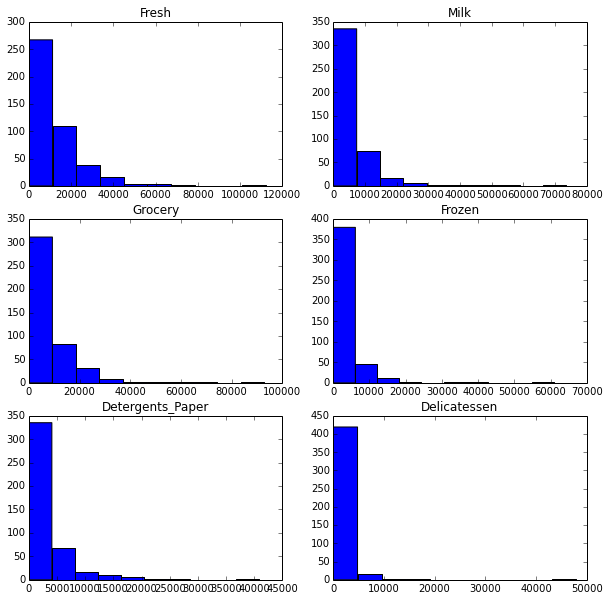

In [55]:
plt.figure(figsize=(10,10))
for i, col in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    plt.hist(data[col])
    plt.title(col)

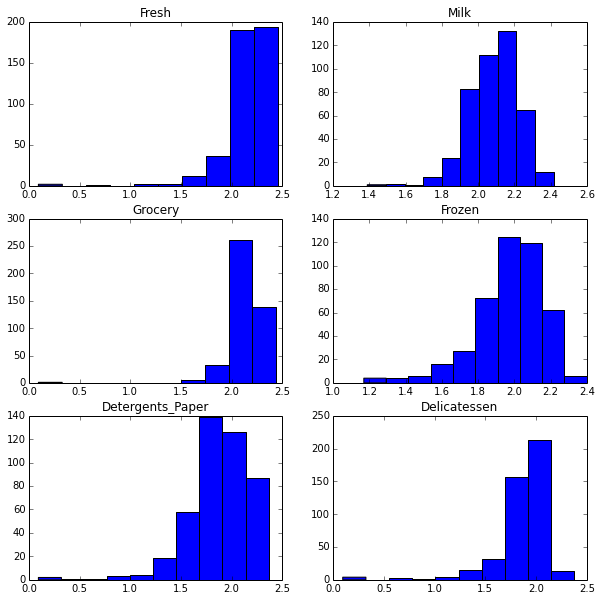

In [57]:
# distribution is skewed, so we log transform
for col in data.columns:
    data[col] = np.log(data[col])
plt.figure(figsize=(10,10))
for i, col in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    plt.hist(data[col])
    plt.title(col)

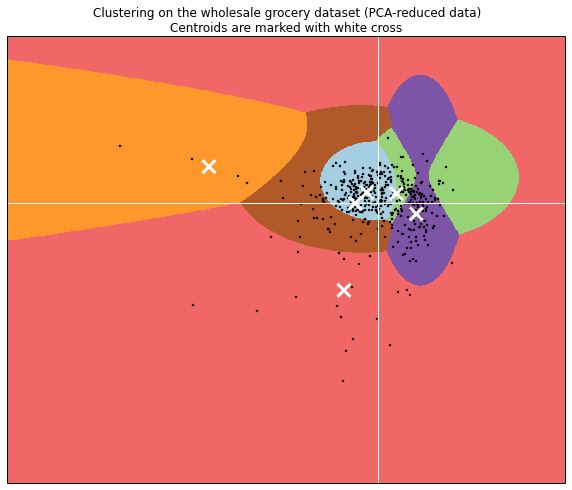

In [59]:
# pca
reduced_data = PCA(n_components=2).fit_transform(data)
# gmm
GMMclusters6 = GMM(n_components=6).fit(reduced_data)

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.

Z6 = GMMclusters6.predict(np.c_[xx.ravel(), yy.ravel()])

GMMcentroids6 = GMMclusters6.means_

plotClusters(GMMcentroids6, Z6)

Data is now spread out and gaussian like. GMM here will excel when the data has a gaussian like distribution. 